# Assigment 4

##### Geoffroy Penny, milucy fernandes, Polly

In [57]:
import pandas as pd
import seaborn as sns
sns.set()
from sklearn import tree
from treeviz import tree_print
from sklearn.metrics import accuracy_score

In [58]:
df = pd.read_csv('Garch.csv')

In [59]:
df.head()

,Unnamed: 0,date,day,dm,ddm,bp,cd,dy,sf
0,1,800102,wednesday,0.5861,NaN,2.2490,0.8547,0.004206,0.6365
1,2,800103,thursday,0.5837,-0.004103,2.2365,0.8552,0.004187,0.6357
2,3,800104,friday,0.5842,0.000856,2.2410,0.8566,0.004269,0.6355
3,4,800107,monday,0.5853,0.001881,2.2645,0.8538,0.004315,0.6373
4,5,800108,tuesday,0.5824,-0.004967,2.2560,0.8553,0.004257,0.6329


#### To drop the NaN's rows from our data

In [60]:
df = df.dropna(how='any', axis=0)

#### To drop the categorical columns from our data

In [61]:
df_numerical = df.drop(['Unnamed: 0', 'date', 'day'], axis=1)

#### The Numerical data set

In [72]:
df_numerical.head()

,dm,ddm,bp,cd,dy,sf
1,0.5837,-0.004103,2.2365,0.8552,0.004187,0.6357
2,0.5842,0.000856,2.2410,0.8566,0.004269,0.6355
3,0.5853,0.001881,2.2645,0.8538,0.004315,0.6373
4,0.5824,-0.004967,2.2560,0.8553,0.004257,0.6329
5,0.5834,0.001716,2.2650,0.8565,0.004245,0.6349


#### Some scatter plots

C:\Users\geoffroy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


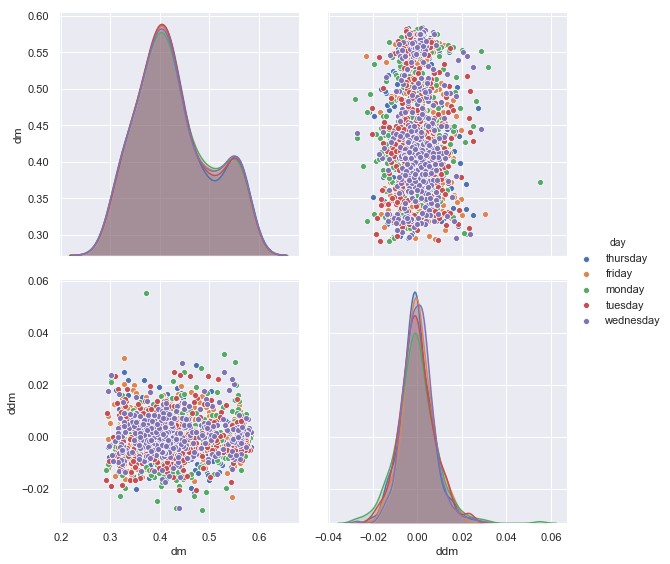

In [63]:
sns.pairplot(df, hue='day', height=4, vars=["dm", "ddm"])

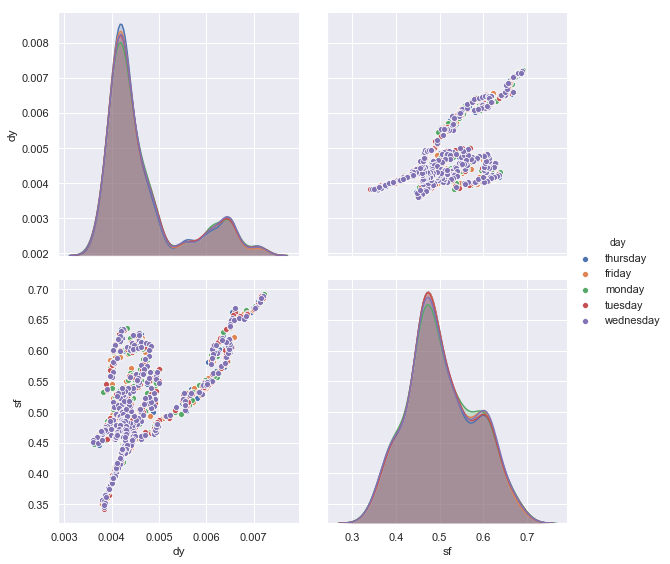

In [64]:
sns.pairplot(df, hue='day', height=4, vars=["dy", "sf"])

#### Bar graphs for the 'Days' Column 

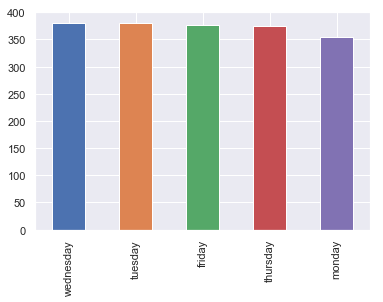

In [65]:
df['day'].value_counts().plot(kind='bar')

#### Histograms for 'dm' and 'ddm' columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D096BC5FD0>]],
      dtype=object)

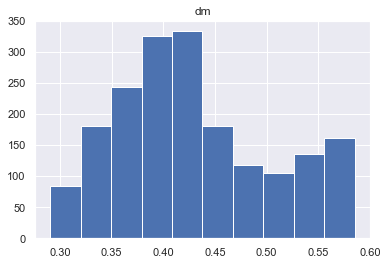

In [66]:
df.hist("dm")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D096BF5710>]],
      dtype=object)

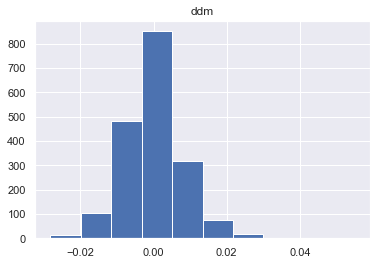

In [67]:
df.hist("ddm")

#### Set up the data for the decision tree

In [68]:
df_dtree = tree.DecisionTreeClassifier(criterion='entropy')

In [69]:
df_categorical = pd.DataFrame(df['day'])

In [71]:
df_dtree.fit(df_numerical, df_categorical)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Print the tree

In [74]:
tree_print(df_dtree, df_numerical)

if ddm =< -0.00841267267242074: 
  |then if bp =< 1.8774999976158142: 
  |  |then if cd =< 0.7819499969482422: 
  |  |  |then if ddm =< -0.019170846790075302: 
  |  |  |  |then if cd =< 0.738400012254715: 
  |  |  |  |  |then if cd =< 0.7086499929428101: 
  |  |  |  |  |  |then wednesday
  |  |  |  |  |  |else monday
  |  |  |  |  |else if dm =< 0.44849999248981476: 
  |  |  |  |  |  |then thursday
  |  |  |  |  |  |else friday
  |  |  |  |else if ddm =< -0.016486816108226776: 
  |  |  |  |  |then if cd =< 0.7126000225543976: 
  |  |  |  |  |  |then friday
  |  |  |  |  |  |else if dy =< 0.004856499843299389: 
  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |else if bp =< 1.4825000166893005: 
  |  |  |  |  |  |  |  |then monday
  |  |  |  |  |  |  |  |else tuesday
  |  |  |  |  |else if cd =< 0.7765499949455261: 
  |  |  |  |  |  |then if bp =< 1.5197499990463257: 
  |  |  |  |  |  |  |then if dm =< 0.48749999701976776: 
  |  |  |  |  |  |  |  |then if bp =< 1.0722500085830688: 


#### Find the predicted labels

In [78]:
predict_array = df_dtree.predict(df_numerical)

In [79]:
predicted_labels = pd.DataFrame(predict_array)

In [80]:
predicted_labels.columns = ['day']

#### The predicted labels

In [81]:
predicted_labels.head()

,day
0,thursday
1,friday
2,monday
3,tuesday
4,wednesday


#### The actual labels

In [83]:
df_categorical.head()

,day
1,thursday
2,friday
3,monday
4,tuesday
5,wednesday


In [85]:
print("Our model accuracy is: {}".format(accuracy_score(df_categorical, predicted_labels)))

Our model accuracy is: 0.9994640943193998


#### Creates the second dtree with max depth of 2

In [86]:
dtree2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [87]:
dtree2.fit(df_numerical,df_categorical)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
tree_print(dtree2,df_numerical)

if ddm =< -0.00841267267242074: 
  |then if bp =< 1.8774999976158142: 
  |  |then monday
  |  |else thursday
  |else if ddm =< 0.025036961771547794: 
  |  |then wednesday
  |  |else monday
<---->
Tree Depth:  2


In [89]:
predict_array2 = dtree2.predict(df_numerical)

In [90]:
predicted_labels2 = pd.DataFrame(predict_array2)

In [91]:
predicted_labels2.columns = ['day'] 

In [93]:
print("Our model accuracy is: {}".format(accuracy_score(df_categorical, predicted_labels2)))

Our model accuracy is: 0.22561629153269025
